In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from datasets.endovis import Endovis2017
import numpy as np
import torch
import matplotlib.pyplot as plt
import inspect
from general_utils import TrainingLogger, get_attribute, filter_args, log, training_config_from_cli_args
from general_utils import AttributeDict
import yaml

d:\PhD\repositories\clipseg\.CLIPSEG\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
experiment_name = "endovis2017.yaml"
experiment_id = 0

yaml_config = yaml.load(open(f'experiments/{experiment_name}'), Loader=yaml.SafeLoader) 

config = yaml_config['configuration']

config = {**config, **yaml_config['individual_configurations'][experiment_id]}

config = AttributeDict(config) #a new type

dataset_cls = get_attribute(config.dataset)  #😉 dataset args from config
_, dataset_args, _ = filter_args(config, inspect.signature(dataset_cls).parameters) #😉 dataset args filtered


In [4]:
training_data = Endovis2017(**dataset_args)

In [5]:
len(training_data)

12250

In [6]:
from PIL import Image

a[0] is (img, and vis). vis is phrase, masked_img, true. 

a[0] is img, phrase, masked_img, true

a[1] is seg, empty, and i

I want to plot img x[0][0], masked_img x[0][2], segmentation x[1][0]

10333


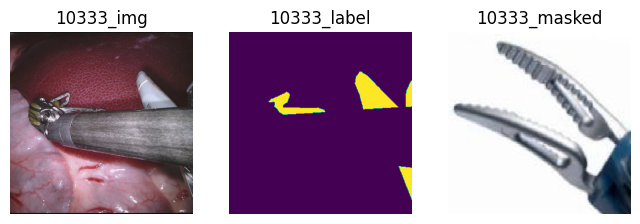

In [8]:


figure = plt.figure(figsize=(8, 8))
num_of_samples = 1
num_img_per_sample = 3
rows, cols = num_of_samples, num_img_per_sample #😉 4 because I want to display img1, img2, semantic, opticalflow
for i in range(0, num_of_samples):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    print(sample_idx)
    # sample_idx = 2738
    data_x, data_y = training_data[sample_idx]

    
    # print(label_map.shape)
    # print(flow_map.shape)
    img = data_x[0]
    img = np.moveaxis(img.numpy(), 0, -1)
    # print("img.shape", img.shape)

    label_map = data_y[0]
    label_map = label_map.numpy().squeeze(0)
    # print(f"label_map.shape{label_map.shape}")

    masked_img = data_x[2]
    # print('masked_img.shape',masked_img.shape)
    masked_img = np.moveaxis(masked_img.numpy(), 0, -1)
    # print('masked_img.shape',masked_img.shape)
    
    figure.add_subplot(rows, cols, (i*num_img_per_sample) + 1 )
    plt.title(f"{sample_idx}_img")
    plt.axis("off")
    plt.imshow(img)

    figure.add_subplot(rows, cols, (i*num_img_per_sample) + 2)
    plt.title(f"{sample_idx}_label")
    plt.axis("off")
    plt.imshow(label_map)

    figure.add_subplot(rows, cols, (i*num_img_per_sample) + 3)
    plt.title(f"{sample_idx}_masked")
    plt.axis("off")
    plt.imshow(masked_img)
plt.show()

In [11]:
np.max(label_map)

255.0

In [1]:
import cv2

In [2]:
path = "./datasets/Endovis2017/cropped_train\instrument_dataset_1/clipseg_masks/frame000_bipolar_forceps.png"

In [3]:
a = cv2.imread(path)

In [4]:
a.shape

(1024, 1280, 3)